In [1]:
import pandas as pd
import numpy as np


columns = [ 'No.','Transaction_date','House_age','Distance_to_MRT_station','No_of_Convenience_Store', 'Latitde', 'Longitude', 'House_price_per_unit_area']
# Read the data set of "Real Estate" in data.
data= pd.read_csv('Real estate.csv',names=columns,sep=',', skiprows=1, )
data.pop('No.')

# Printing the data
data

,Transaction_date,House_age,Distance_to_MRT_station,No_of_Convenience_Store,Latitde,Longitude,House_price_per_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [2]:
#Get X and Y variables
columns = data.columns
columns = columns.drop("House_price_per_unit_area")
X_data = data[columns]

Y_data = data['House_price_per_unit_area']
Y_data

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House_price_per_unit_area, Length: 414, dtype: float64

In [3]:
#is there any duplicate lines ? 

print('data before duplicate rows removal ', data.shape) 
data = data.drop_duplicates(subset = columns)
print('data after duplicate rows removal ', data.shape) 
#no duplicate line 

data before duplicate rows removal  (414, 7)
data after duplicate rows removal  (394, 7)


# Modelling


In [4]:
from sklearn import neighbors

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics

RandomForestRegressor(random_state=0)

In [92]:
#apply cross validation to compare between Models, KNN , LR , RF

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

names = []
scores = []
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3) # 70% training and 30% test

for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    scores.append(model.score(X_test, y_test)) #printing score

score_knn = np.max(scores)
score_knn 

0.6915687041556055

In [75]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 
score_RF = regressor.score(X_test, y_test)
score_RF

0.5958610259984762

In [89]:
#Linear Regression 

L_regressor = LinearRegression() #training the algorithm  
L_regressor.fit(X_train, y_train) #training the algorithm

#For retrieving the slope:
print(L_regressor.coef_)

#To retrieve the intercept:
print(L_regressor.intercept_)

[ 5.68173791e+00 -2.20162069e-01 -4.83826602e-03  1.06556759e+00
  1.88504742e+02 -1.52270824e+01]
-14251.537015919375


In [90]:
LR_score = L_regressor.score(X_test, y_test)
LR_score

0.6839266427689739

In [106]:
#polynomial regression 


from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)


poly_score = r2_score(y_train,y_poly_pred)
poly_score

0.68418699325412

In [107]:
scores_df =  pd.DataFrame({'Name': ['KNN', 'RF', 'LR', 'PR'], 'Score': [score_knn, score_RF, LR_score, poly_score]})
scores_df

,Name,Score
0,KNN,0.691569
1,RF,0.595861
2,LR,0.683927
3,PR,0.684187


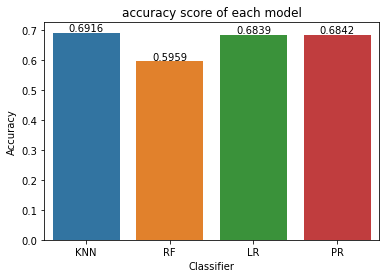

In [108]:
#plotting scores of each algorithm 

import seaborn as sns
import matplotlib.pyplot as plt

axis = sns.barplot(x = 'Name', y = 'Score', data = scores_df)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

plt.title('accuracy score of each model')    
plt.show()

Based on our results it seems that K Nearest Neighbor has the best results 
We will work on optimizing the results by finding the best parameters 

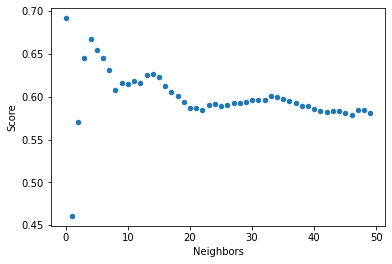

In [109]:
#-2 Let's run K nearest Neighbers with different values of n= (range (1,50)) to get n value with the best accuracy
  
KNN = pd.DataFrame({'Neighbors': np.arange(50) , 'Score': scores})

KNN.plot(x ='Neighbors', y='Score', kind = 'scatter')
plt.show()

it seems that best results is achieved for N in the range [3,7]

In [110]:
#Grid Search CV to test other hyper-parameters and in order to obtain the parameters that output the best score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' : np.arange(1, 50), 'metric' : ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid , cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [111]:
grid.best_params_ #best parameters

{'metric': 'manhattan', 'n_neighbors': 3}

In [112]:
#our Final Model is : 
model_Final =grid.best_estimator_